In [34]:
import numpy as np
import pandas as pd
from keras import models
from keras import layers

import matplotlib.pyplot as plt
%matplotlib inline


from keras.datasets import imdb


In [20]:
# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [22]:
# Here is a list of maximum indexes in every review
print(type([max(sequence) for sequence in train_data]))


<class 'list'>


In [23]:
# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])



9999

In [24]:
# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()


In [25]:
# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


In [26]:
# Step 3: decode the review, mapping integer indices to words
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [27]:
# Vectorize input data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i,sequence in enumerate(sequences):
      results[i,sequence] = 1 
    return results


In [28]:
# Vectorize training Data
X_train = vectorize_sequences(train_data)
# Vectorize testing Data
X_test = vectorize_sequences(test_data)

X_train[0]

X_train.shape



(25000, 10000)

In [29]:
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [30]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [31]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [32]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [33]:
history = model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, verbose =1, validation_data=(X_val, y_val))

history_dict = history.history
history_dict.keys()


Epoch 1/20
30/30 [==============================] - 3s 80ms/step - loss: 0.5333 - binary_accuracy: 0.7833 - val_loss: 0.4182 - val_binary_accuracy: 0.8550
Epoch 2/20
30/30 [==============================] - 2s 63ms/step - loss: 0.3415 - binary_accuracy: 0.8877 - val_loss: 0.3203 - val_binary_accuracy: 0.8820
Epoch 3/20
30/30 [==============================] - 2s 64ms/step - loss: 0.2551 - binary_accuracy: 0.9153 - val_loss: 0.3089 - val_binary_accuracy: 0.8763
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2083 - binary_accuracy: 0.9278 - val_loss: 0.2755 - val_binary_accuracy: 0.8911
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1755 - binary_accuracy: 0.9407 - val_loss: 0.2902 - val_binary_accuracy: 0.8819
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1484 - binary_accuracy: 0.9512 - val_loss: 0.2776 - val_binary_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

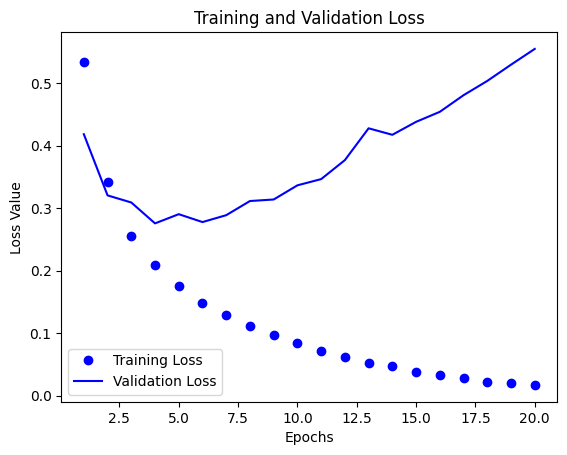

In [36]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()


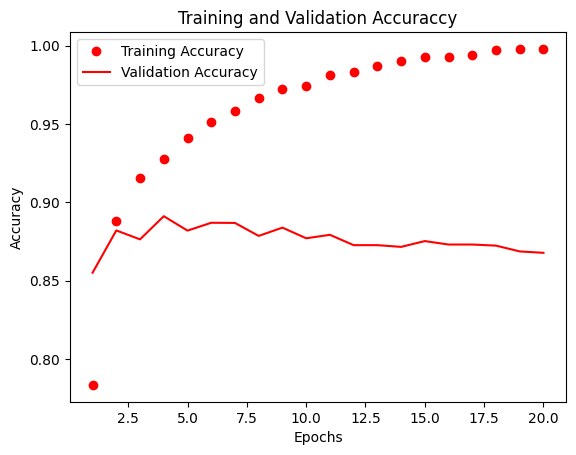

In [37]:
# Training and Validation Accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [38]:
model.fit(partial_X_train, partial_y_train, epochs=3, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/3
30/30 [==============================] - 2s 57ms/step - loss: 0.0155 - binary_accuracy: 0.9979 - val_loss: 0.5728 - val_binary_accuracy: 0.8694
Epoch 2/3
30/30 [==============================] - 1s 39ms/step - loss: 0.0104 - binary_accuracy: 0.9995 - val_loss: 0.6483 - val_binary_accuracy: 0.8575
Epoch 3/3
30/30 [==============================] - 2s 54ms/step - loss: 0.0118 - binary_accuracy: 0.9985 - val_loss: 0.6211 - val_binary_accuracy: 0.8692


In [39]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)


782/782 [==============================] - 3s 3ms/step


In [40]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0


In [41]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)
